In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
dtypes_dict = {'created':'str',  'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_language': 'category', \
                'application_id': 'category', 'ref_hash': 'category', 'kind': 'str', 'user_agent': 'str'}

installs = pd.read_csv('data/installs.csv.gzip', dtype=dtypes_dict, parse_dates=['created'])
# installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [147]:
installs.dtypes

created               datetime64[ns]
application_id              category
ref_type                    category
ref_hash                    category
attributed                      bool
implicit                        bool
device_countrycode          category
device_brand                 float32
device_model                 float64
session_user_agent            object
user_agent                    object
event_uuid                    object
kind                          object
wifi                          object
trans_id                      object
ip_address                     int64
device_language             category
dtype: object

In [136]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,day,hour
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,False,6333597102633388268,3.083058e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,13,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,False,6333597102633388268,3.083058e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,13,4
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.3013777759776993e+18,13,4
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,13,4
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.3013777759776993e+18,10,22


In [8]:
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
click_hash            3412
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [37]:
installs.loc[installs['device_model'].isnull()]

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
2157,2019-03-09 16:08:19.919,30,1494519392962156891,4364935818432173881,False,True,6333597102633388268,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,78082c4c-0fe1-4fc7-a718-4eba1d943b9c,Open,NaN,NaN,2208800741316080623,NaN


### **1) Instalaciones por pais y sistema operativo usado**

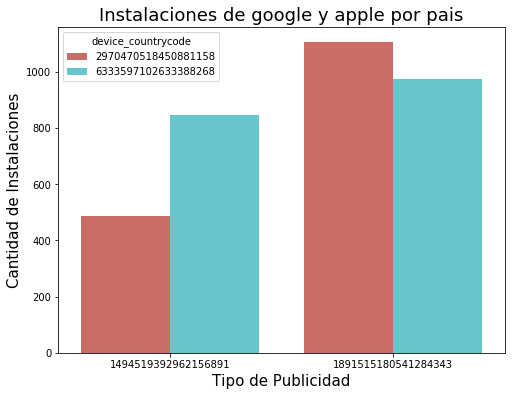

In [25]:
plt.figure(figsize=(8, 6))
country_device = sns.countplot(x='ref_type', data=installs, palette='hls', hue='device_countrycode')

country_device.set_title("Instalaciones de google y apple por pais", fontsize =18)
country_device.set_xlabel("Tipo de Publicidad", fontsize = 15)
country_device.set_ylabel("Cantidad de Instalaciones", fontsize = 15)
plt.savefig('image/installs_bar_ref_type_countrycode.png')

### **2) Cantidad de instalaciones por hora y día**

In [30]:
installs['day'] = pd.DatetimeIndex(installs['created']).day;
installs['hour'] = pd.DatetimeIndex(installs['created']).hour;

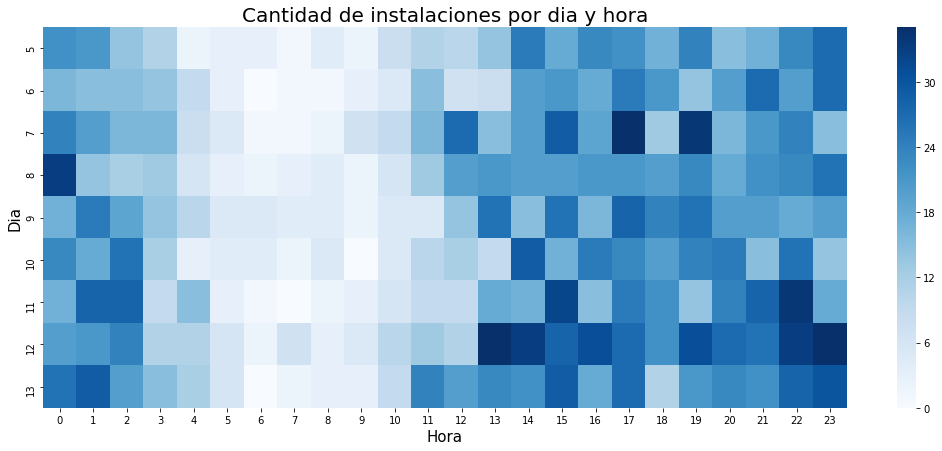

In [190]:
day_hours = installs.groupby(['hour', 'day'])['day'].count().unstack()
day_hours = day_hours.fillna(0).T
plt.figure(figsize=(18, 7))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")
heap_map.set_title("Cantidad de instalaciones por dia y hora", fontsize=20)
heap_map.set_xlabel("Hora", fontsize=15)
heap_map.set_ylabel("Dia", fontsize=15)
plt.savefig('image/installs_heat_day_hour.png')

### **3) Tipo de celular al que mas instalaciones se le atribuyen**

In [140]:
print(list(installs['device_model'].value_counts().iloc[:30]))

[759, 276, 76, 65, 63, 56, 55, 53, 46, 41, 40, 40, 38, 38, 36, 36, 31, 30, 30, 28, 27, 25, 23, 22, 22, 21, 21, 20, 19, 19]


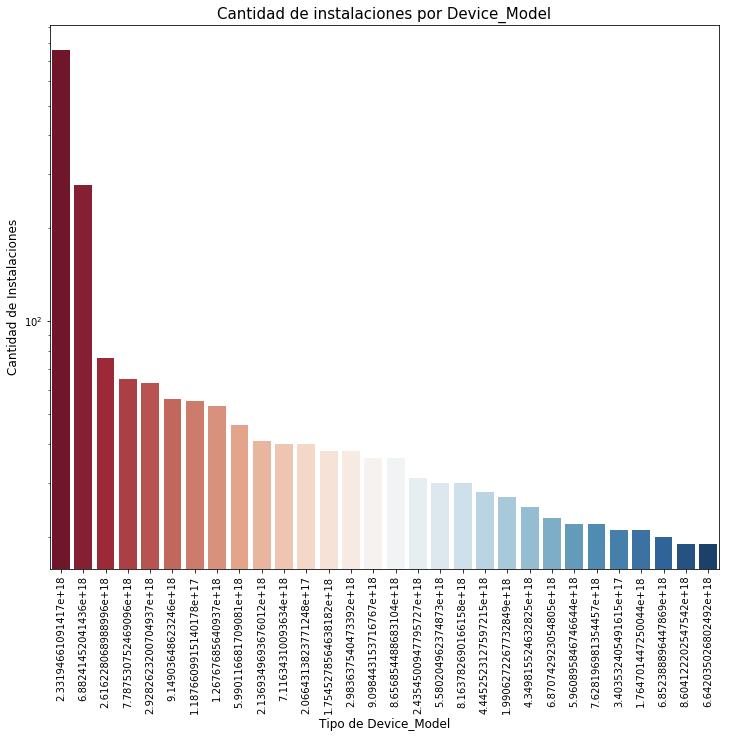

In [142]:
plt.figure(figsize=(12, 10))
device_installs = sns.countplot(x='device_model', data=installs, palette='RdBu',log=True, \
                      order=installs['device_model'].value_counts().iloc[:30].index)
device_installs.set_xticklabels(device_installs.get_xticklabels(), rotation=90)
device_installs.set_title("Cantidad de instalaciones por Device_Model", fontsize =15)
device_installs.set_xlabel("Tipo de Device_Model", fontsize = 12)
device_installs.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
plt.savefig('image/installs_bar_device_model.png')

### **4) Intalaciones por pais comparadas con el uso de wifi**

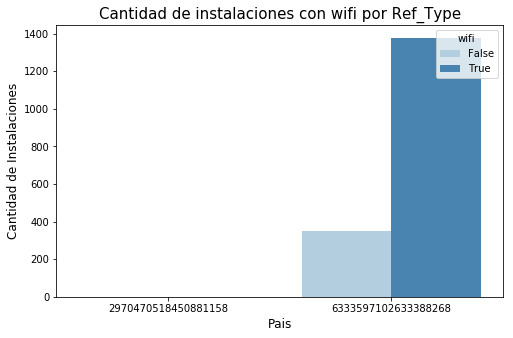

In [5]:
plt.figure(figsize=(8, 5))
wifi_type = sns.countplot(x='ref_type', data=installs, palette='Blues', hue='wifi') 
wifi_type.set_title("Cantidad de instalaciones con wifi por Ref_Type", fontsize =15)
wifi_type.set_xlabel("Tipo de Ref_Type", fontsize = 12)
wifi_type.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
plt.savefig('image/installs_bar_wifi_ref_type.png')

### **5) Diferencia de cantidad de instalaciones con o sin wifi**

/home/eliana/fiuba/datos7506/envdt/lib/python3.6/site-packages/matplotlib/legend.py:1270: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


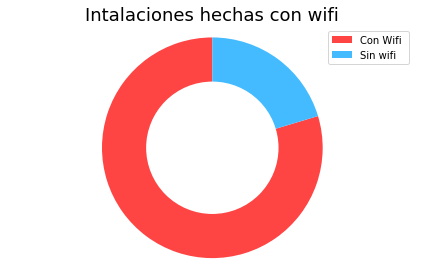

In [25]:
# labels = 
colors = ['#ff4444', '#44bbff']
wifi_count = installs['wifi'].value_counts()

fig, ax1 = plt.subplots()
patches, texts=  plt.pie(wifi_count, colors=colors, startangle=90)
ax1.set_title("Intalaciones hechas con wifi", fontsize =18)
plt.legend(patches, labels=['Con Wifi ', 'Sin wifi'], loc="best")
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('image/installs_donut_wifi.png')
plt.show()

### **6) Los Eventos realizados luego de instalar la aplicación**

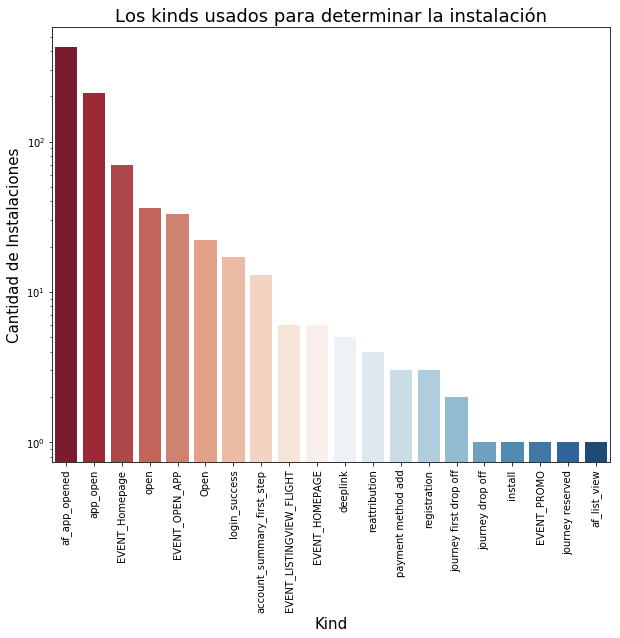

In [26]:
plt.figure(figsize=(10, 8))
kind_group = sns.countplot(x='kind', data=installs, palette='RdBu', log=True, \
                           order=installs['kind'].value_counts().index)
kind_group.set_xticklabels(kind_group.get_xticklabels(), rotation=90)
kind_group.set_title("Los kinds usados para determinar la instalación", fontsize =18)
kind_group.set_ylabel("Cantidad de Instalaciones", fontsize = 15)
kind_group.set_xlabel("Kind", fontsize = 15)
plt.savefig('image/installs_bar_kind.png')

### **7) Cantidad de instalaciones por aplicacion**

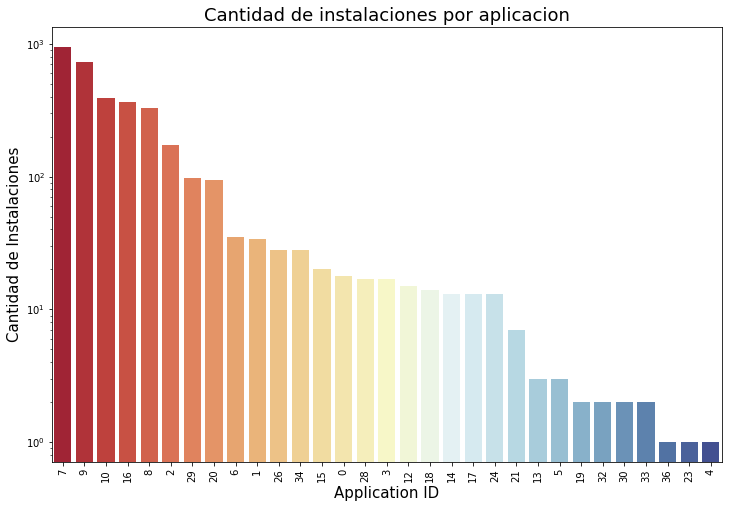

In [149]:
plt.figure(figsize=(12, 8))
app_group = sns.countplot(x='application_id', data=installs, palette='RdYlBu', log=True, \
                          order=installs['application_id'].value_counts().index)
app_group.set_xticklabels(app_group.get_xticklabels(), rotation=90)
app_group.set_title("Cantidad de instalaciones por aplicacion", fontsize =18)
app_group.set_xlabel("Application ID", fontsize = 15)
app_group.set_ylabel("Cantidad de Instalaciones", fontsize = 15)
plt.savefig('image/installs_bar_application_id.png')

## **8) Cantidad de Instalaciones de las aplicaciones más populares por día**

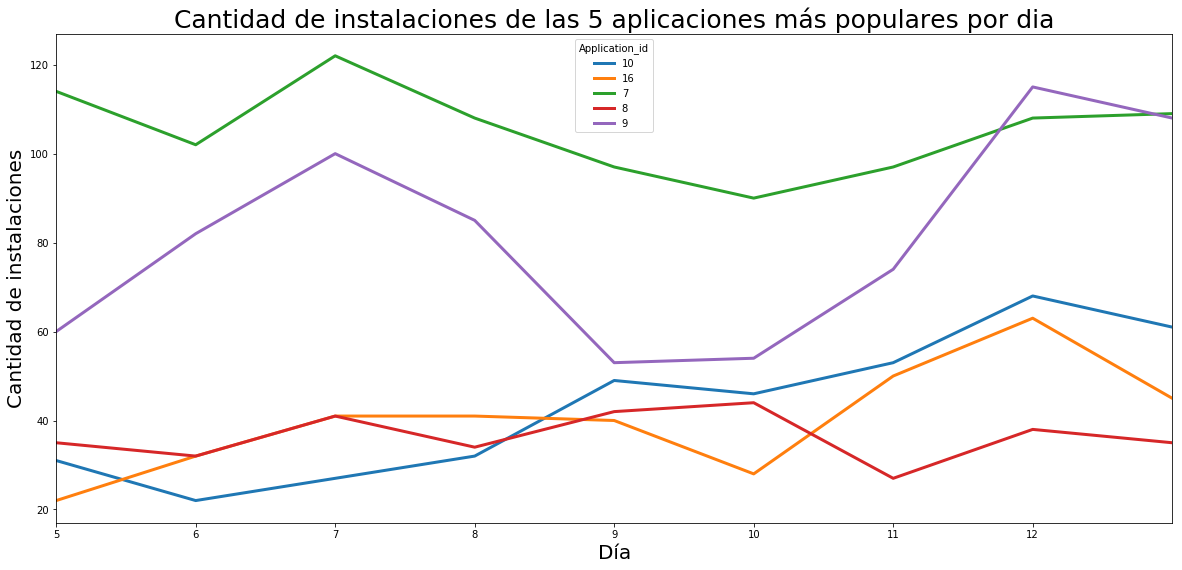

In [112]:
top5_app = [x for x in installs['application_id'].value_counts().head(5).keys()]
top5_group = installs.loc[installs['application_id'].isin(top5_app)]
top_instalation = top5_group.groupby(['application_id', 'day']).size()

fig, ax = plt.subplots()
for key, grp in top_instalation.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,9), lw=3)
plt.title("Cantidad de instalaciones de las 5 aplicaciones más populares por dia",size=25)
ax.set_ylabel('Cantidad de instalaciones',size=20)
ax.set_xlabel('Día',size=20)
plt.legend(title='Application_id')
plt.xticks(np.arange(8), np.arange(5,13))
plt.savefig('image/installs_line_application_day.png')
plt.show()

## **9) Cantidad de Instalaciones de las  aplicaciones más populares por hora**

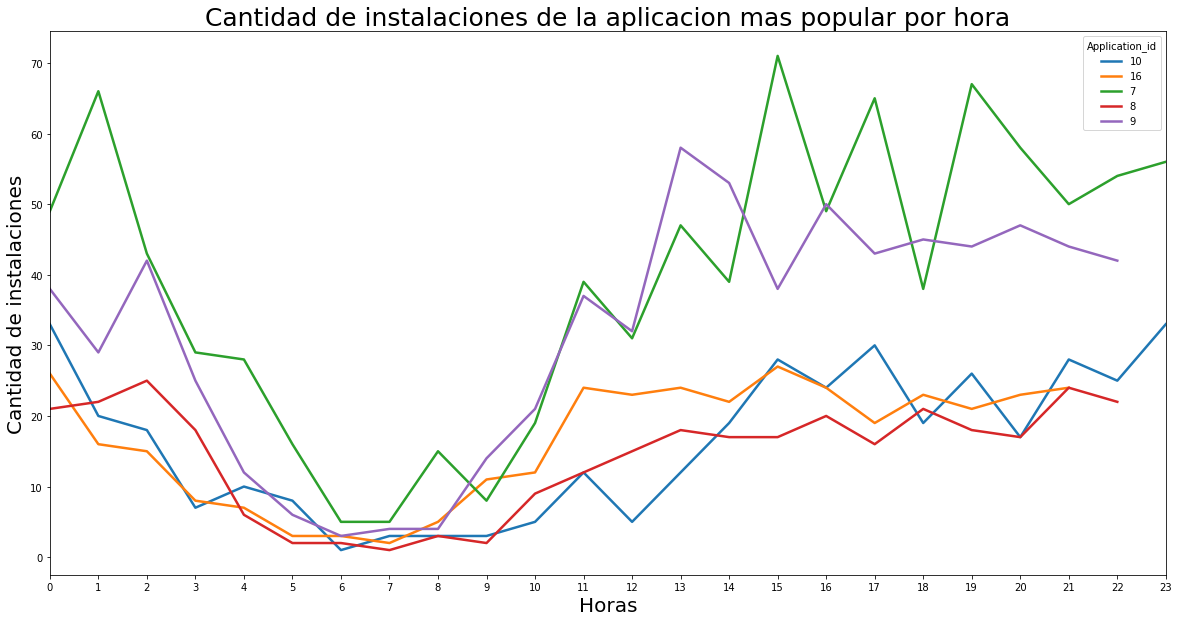

In [114]:
top_app = installs['application_id'].value_counts().head(5).keys()
top_group = installs.loc[installs['application_id'].isin(top_app)]
top_install = top_group.groupby(['application_id', 'hour']).size()

fig, ax = plt.subplots()
for key, grp in top_install.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='hour', y='count', label=key, figsize=(20,10), lw=2.5)
plt.title("Cantidad de instalaciones de la aplicacion mas popular por hora",size=25)
ax.set_ylabel('Cantidad de instalaciones',size=20);
ax.set_xlabel('Horas',size=20);
plt.legend(title='Application_id')
plt.xticks(np.arange(24), np.arange(24))
plt.savefig('image/installs_line_application_hour.png')
plt.show()

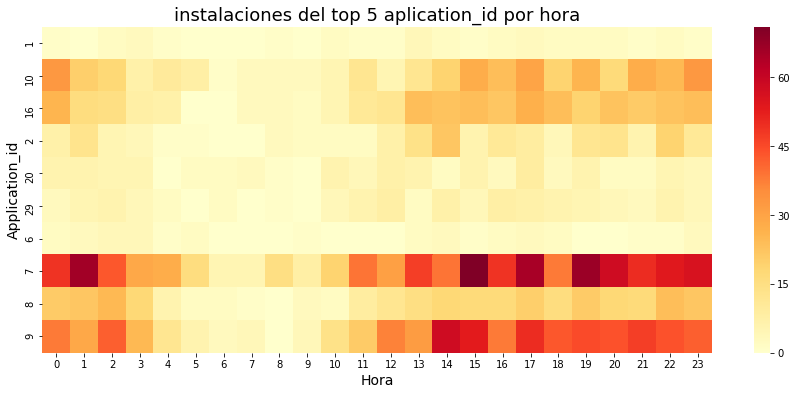

In [36]:
top_app_id = [x for x in installs['application_id'].value_counts().head(10).keys()]
top_group = installs.loc[installs['application_id'].isin(top_app_id)]
day_hours = top_group.groupby([ 'application_id', 'hour'])['hour'].count().unstack()
day_hours
day_hours = day_hours.fillna(0)
plt.figure(figsize=(15, 6))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="YlOrRd")
heap_map.set_title("instalaciones del top aplication_id por hora", fontsize=18)
heap_map.set_xlabel("Hora", fontsize=14)
heap_map.set_ylabel("Application_id", fontsize=14)
plt.savefig('image/installs_heat_application_hour.png')

## **10) Cantidad de Instalaciones en los dispositivos mas usados por día**

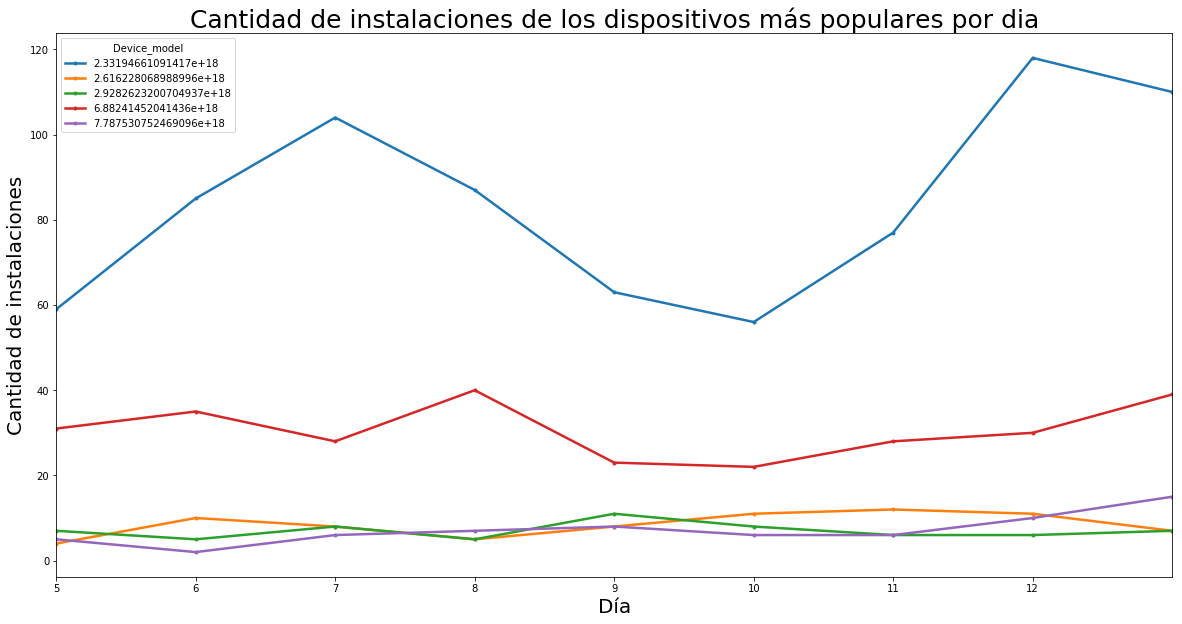

In [110]:
top_device = [x for x in installs['device_model'].value_counts().head(5).keys()]
top_group = installs.loc[installs['device_model'].isin(top_device)]
top_device_install = top_group.groupby(['device_model', 'day']).size()

fig, ax = plt.subplots()
for key, grp in top_device_install.groupby(['device_model']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, \
                  figsize=(20,10), style='.-', lw=2.5)
plt.title("Cantidad de instalaciones de los dispositivos más populares por dia",size=25)
ax.set_ylabel('Cantidad de instalaciones',size=20);
ax.set_xlabel('Día',size=20);
plt.legend(title='Device_model', loc='upper left')
plt.xticks(np.arange(8), np.arange(5,13))
plt.savefig('image/installs_line_device_model_day.png')
plt.show()

## **11) Cantidad de Instalaciones del device_brand mas usado por día**

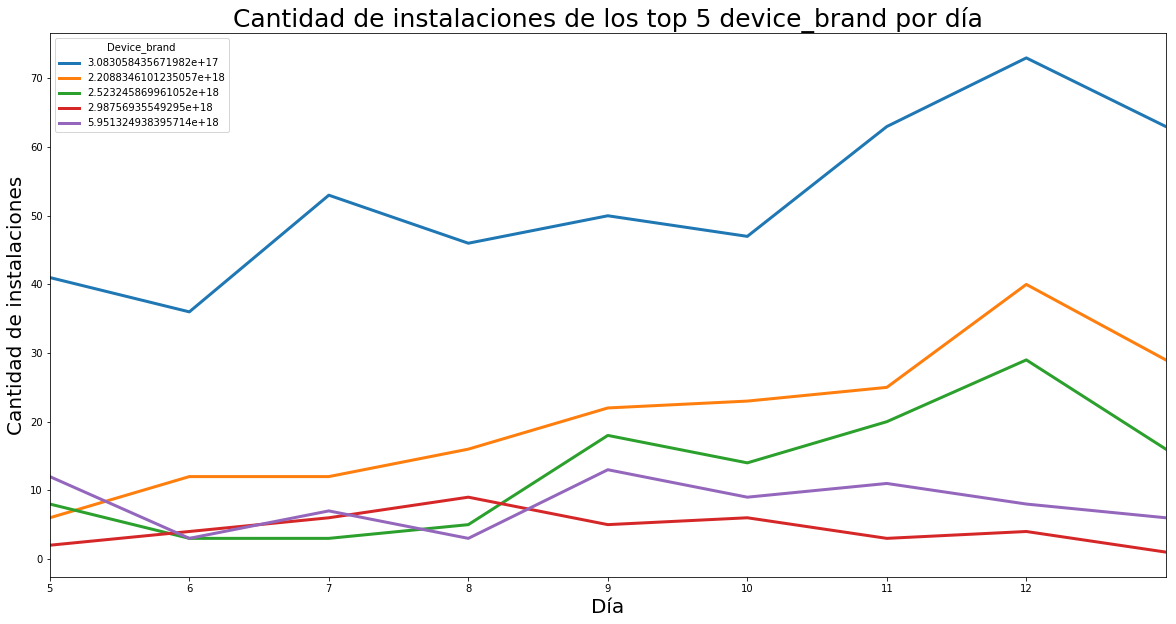

In [115]:
top_device_brand = [x for x in installs['device_brand'].value_counts().head(5).keys()]
top_group = installs.loc[installs['device_brand'].isin(top_device_brand)]
top_device_install = top_group.groupby(['device_brand', 'day']).size() #.to_frame().reset_index()

fig, ax = plt.subplots()
for key, grp in top_device_install.groupby(['device_brand']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,10), lw=3)
plt.title("Cantidad de instalaciones de los top 5 device_brand por día",size=25)
ax.set_ylabel('Cantidad de instalaciones',size=20);
ax.set_xlabel('Día',size=20);
plt.legend(title='Device_brand', loc='upper left')
plt.xticks(np.arange(8), np.arange(5,13))
plt.savefig('image/installs_line_device_brand_day.png')
plt.show()

## **12) Cantidad de Instalaciones por ref_hash**

[2629, 356, 21, 2]


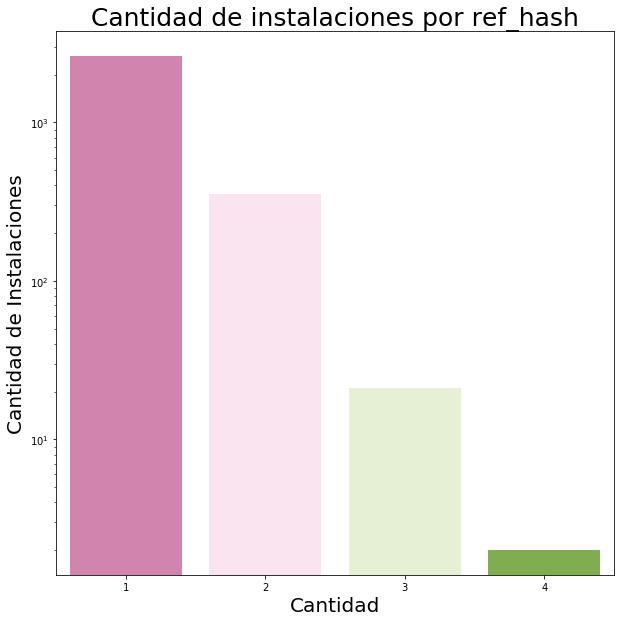

In [158]:
ref_hash_len = installs['ref_hash'].value_counts()
print(list(ref_hash_len.value_counts()))
# labels = '12629', '356', '21', '2'
plt.figure(figsize=(10, 10))
hash_ref_group = sns.countplot(x=ref_hash_len, data=installs, palette='PiYG', log=True)
# hash_ref_group.legend(labels=labels)
hash_ref_group.set_title("Cantidad de instalaciones por ref_hash", fontsize =25)
hash_ref_group.set_xlabel('Cantidad', fontsize = 20)
hash_ref_group.set_ylabel("Cantidad de Instalaciones", fontsize = 20)
plt.savefig('image/installs_bar_ref_hash.png')

## **13) Cantidad de instalaciones por usuario**

In [9]:
installs['user_agent_app'] = installs['user_agent']
len_user_agent = len(installs['user_agent'])
for i in range(len_user_agent - 1):
    elem = installs['user_agent'].iloc[i]
    if not pd.isnull(elem):
        elem = elem.split('/')
        installs['user_agent_app'].iloc[i] = elem[0]

print(installs['user_agent_app'].value_counts())

nan
Dalvik         956
MercadoPago    731
NextGen         20
HotelUrbano     13
PeixeUrbano      7
takealot         1
Mozilla          1
Name: user_agent_app, dtype: int64


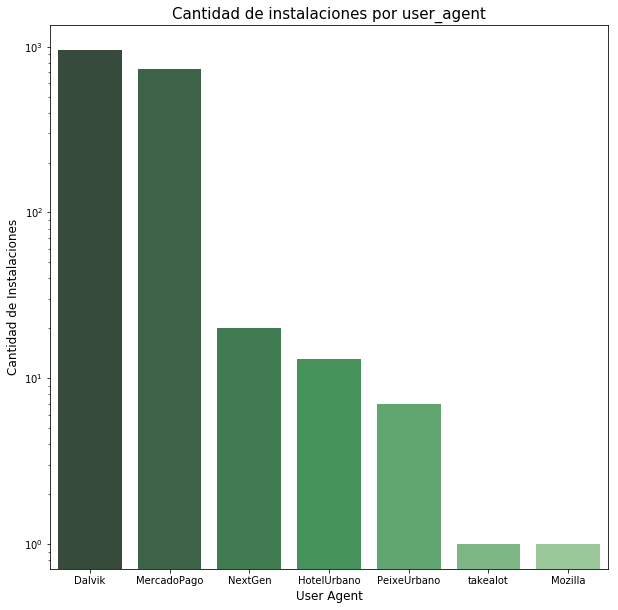

In [63]:
plt.figure(figsize=(10, 10))
app_group = sns.countplot(x='user_agent_app',data=installs, palette='Greens_d', log=True, \
                          order=installs['user_agent_app'].value_counts().index)
app_group.set_title("Cantidad de instalaciones por user_agent", fontsize =15)
app_group.set_xlabel("User Agent", fontsize = 12)
app_group.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
plt.savefig('image/installs_bar_user_agent_app.png')

## **14) Cantidad de instalaciones por device_language**

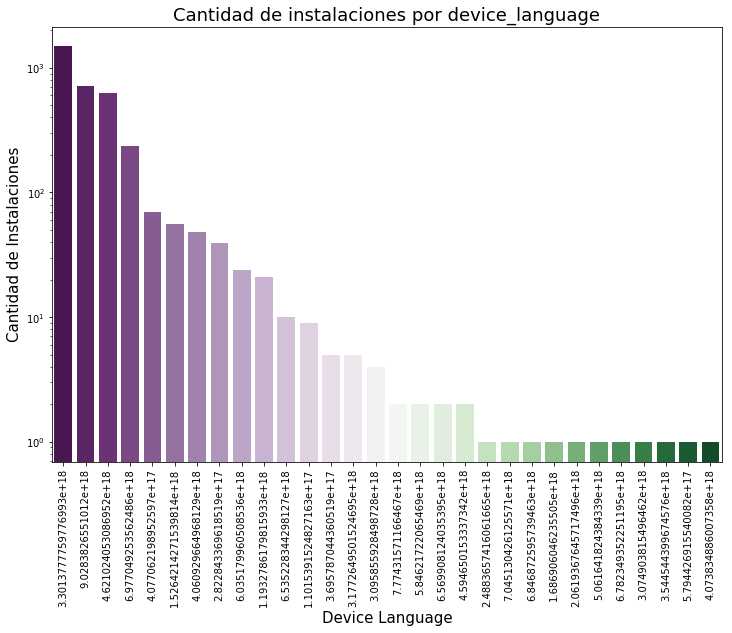

In [150]:
plt.figure(figsize=(12, 8))
app_group = sns.countplot(x='device_language', data=installs, palette='PRGn', log=True, \
                          order=installs['device_language'].value_counts().index)
app_group.set_xticklabels(app_group.get_xticklabels(), rotation=90)
app_group.set_title("Cantidad de instalaciones por device_language", fontsize =18)
app_group.set_xlabel("Device Language", fontsize = 15)
app_group.set_ylabel("Cantidad de Instalaciones", fontsize = 15)
plt.savefig('image/installs_bar_device_language.png')

In [ ]:
# col_names = [ 'ref_hash', 'device_brand', 'device_model', 'ip_address', 'device_language']
# for col in col_names:
#     t5 = [x for x in installs[col].value_counts().head(10).keys()]
#     top_loc = installs.loc[installs[col].isin(t5)]
#     top_group = top_loc.groupby([ col, 'day'])['day'].count().unstack()

#     #plt.figure(figsize=(12, 10))
#     heap_map = sns.heatmap(top_group, cbar=True, cmap="YlOrRd")
#     #heap_map.set_title("Instalaciones del top 5 device_brand por dia", fontsize=18)
#     heap_map.set_xlabel("Dia", fontsize=14)
#     heap_map.set_ylabel(col, fontsize=14)
#     plt.show()